# Project 2 - Face Recognition

Mengxi Wu - mw4355
Qi Yin - qy652


## Set up the environment

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

import os
import cv2

## Load Image Data From directory

The size of Training dataset is: 8 
The size of Test dataset is: 5 
The shape of image is: (231, 195, 3) 


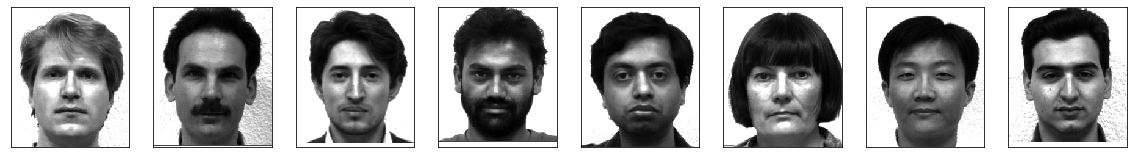

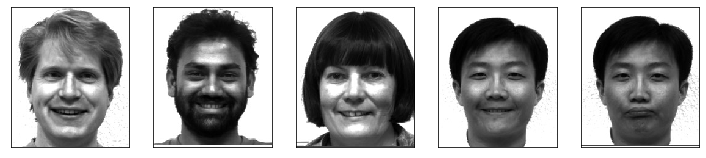

In [3]:
# read images
faces_train = [] # store all train image data
faces_test = [] # store all test image data

train_dir ="Face dataset/Training"
test_dir ="Face dataset/Testing"

# this function is for read image,the input is directory name
def read_directory(directory_name):
    images = []
    # this loop is for read each image in this foder,directory_name is the foder name with images.
    for filename in os.listdir(r"./"+directory_name):
        #print(filename) #just for test
        #img is used to store the image data 
        img = cv2.imread(directory_name + "/" + filename)
        images.append(img)
    return images

faces_train = read_directory(train_dir)
faces_test = read_directory(test_dir)



## check the size of image
print(f"The size of Training dataset is: {len(faces_train)} ")
print(f"The size of Test dataset is: {len(faces_test)} ")
print(f"The shape of image is: {faces_train[0].shape} ")


# use matplotlib to display images
for faces in [faces_train, faces_test]:
    plt.figure(figsize=(20,10))
    for i in range(1,len(faces)+1):
        plt.subplot(2,8,i)
        plt.imshow(faces[i-1])
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [4]:
print(faces_train[0][145][123])

[227 227 227]


## Preprocess Dataset

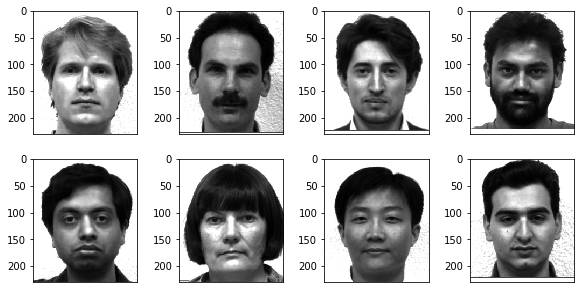

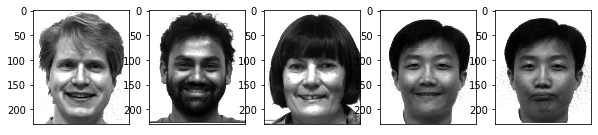

In [5]:
# prepocess training dataset
faces_train_p = np.array(faces_train) # (8, 231, 195, 3)
n_samples, h, w, _ = faces_train_p.shape
npix = h*w
faces_train_p = faces_train_p[:,:,:,0] # (8,231,195)
faces_train_p = faces_train_p.reshape(n_samples, npix) # (8,45045) 


def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

plt.figure(figsize=(10,5))
for i in range(n_samples):    
    plt.subplot(2,4,i+1)
    plt_face(faces_train_p[i])
plt.show()

# preprocess test data
faces_test_p = np.array(faces_test) # (4, 231, 195, 3)
n_samples, h, w, _ = faces_test_p.shape
npix = h*w
faces_test_p = faces_test_p[:,:,:,0]  # (5,231,195)
faces_test_p = faces_test_p.reshape(n_samples, npix) # (5,45045) 

plt.figure(figsize=(10,5))
for i in range(n_samples):    
    plt.subplot(1,n_samples,i+1)
    plt_face(faces_test_p[i])
plt.show()

The shape of mean face is (1, 45045)
[[255.    255.    255.    ... 235.125 233.    232.   ]]


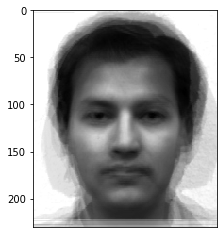

In [6]:
# compute mean face
mean_face = faces_train_p.mean(axis=0)
#print(f"The size of mean face is {mean_face.shape}")
mean_face = mean_face.reshape(-1,1).transpose()
print(f"The shape of mean face is {mean_face.shape}")
print(mean_face)
# print mean face
plt_face(mean_face)
plt.savefig("Mean_face.jpg")
plt.show()

## Implment Eigenface algorithm
${M}$ -> # faces  
${N^2}$ -> # pixels a face  
${A = N^2 \times M}$ put all training faces into a single matrix   
1. Form covairance maatrix ${C= AA^T}$, ${C}$ has dimension ${N^2 \times N^2}$
2. Form ${L = A^TA}$, ${L}$ has dimension of ${M \times M}$
3. Put eigenvectors of ${L}$ into a single matrix ${V}$
4. The ${M}$ largest eigenvectors of ${C}$ can be found by ${U = AV}$.
    ${U}$ then contains ${M}$ eigenfaces and has dimension ${N^2 \times M}$
5. Each Training face can then be projected onto the face space to obtain its eigenface coefficients
$$ \Omega_i = U^T \vec{R_i} \ \ for\ i= 1\ to\ M$$

In [11]:
# subject mean face
faces_train_centered = faces_train_p - mean_face # equals A.T 

# construct L matrix
L = np.dot(faces_train_centered, faces_train_centered.transpose())

# eigen decomposition get eigenvetor of L
eigenvalue, V= np.linalg.eig(L) # equals V
U = np.dot(faces_train_centered.transpose(), V)

print(f'The size of processed traning dataset A is {faces_train_centered.transpose().shape}')
print(f'The size of L is {L.shape}')
print(f'The size of V is {V.shape}')
print(f'The size of eigenvector of C is <=> U.shape =  {U.shape}')
print(U)

The size of processed traning dataset A is (45045, 8)
The size of L is (8, 8)
The size of V is (8, 8)
The size of eigenvector of C is <=> U.shape =  (45045, 8)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.10374354e+02  7.13825191e+01  1.38708489e-14 ...  1.58057480e+01
  -1.57746765e+01  4.41991630e-01]
 [ 1.14233182e+02  6.99162489e+01  1.45439216e-14 ...  1.36987354e+01
  -2.35434532e+01  2.03514010e+00]
 [ 1.07071195e+02  5.89414024e+01  2.17048601e-14 ...  8.41512482e+00
  -3.40746712e+01  4.53234074e+00]]


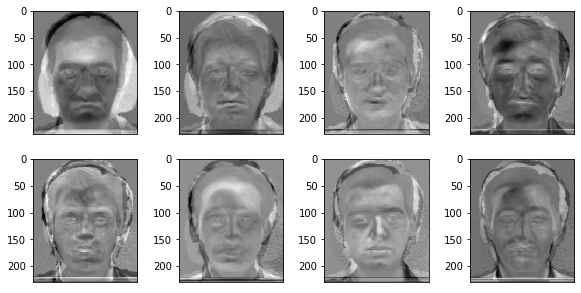

In [8]:
# display 8 eigenvectors 
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    
plt.figure(figsize=(10,5))
nplt = 8
for i in range(nplt):    
    plt.subplot(2,4,i+1)
    plt_face(U[:,i])
    if i == nplt-1:
        plt.savefig("eigenface.jpg")
plt.show()

In [9]:
# get eigenface coefficient
eigenface_coefficients = np.dot(U.transpose(), faces_train_centered.T) 
print(f'The size of eigenface coefficients is {eigenface_coefficients.shape}')

The size of eigenface coefficients is (8, 8)


## Display the result

(8, 8)
(8, 5)
The size of train eigenface coefficients is (8, 8)
[-7.58393182e+07  9.86591897e+07  1.46635347e-08 -7.35308451e+07
  2.03390545e+07  2.09059360e+07 -1.34689494e+07  4.95663886e+06]
++++++++++++++++++++++
[ 8.55914694e+07 -5.32769258e+07  9.39274828e-09 -4.35819945e+04
 -1.02912808e+07  7.27564771e+07 -2.36191334e+07 -2.56112293e+07]
++++++++++++++++++++++
[ 6.79094869e+07  2.86096157e+07  1.72409221e-08 -2.11976451e+07
 -9.00930120e+06 -6.14469992e+07  3.38368115e+06 -4.32998677e+07]
++++++++++++++++++++++
[ 1.59365384e+08 -5.98976188e+07 -1.61003580e-08  3.62392288e+07
  2.39421030e+07 -2.99666082e+07 -3.11659201e+07  1.50158366e+07]
++++++++++++++++++++++
[-2.57010807e+07  5.31036358e+07 -2.93448047e-08  7.67395071e+07
  1.13657321e+07  2.13665227e+07  4.79155988e+07 -8.39149947e+06]
++++++++++++++++++++++
[-3.09965508e+08 -1.01569225e+08 -2.29145029e-08 -7.23282904e+06
  3.43527729e+05 -1.38164759e+07  4.01893283e+06  6.69097274e+05]
++++++++++++++++++++++
[-5.4803567

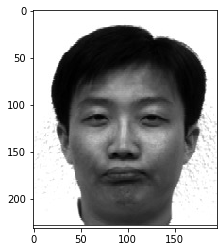

In [10]:
# Compute the Eigenface coefficients of the training images
projected_train = np.dot(U.T, faces_train_centered.T)
print(projected_train.shape)

# Compute the Eigenface coefficients of the test images
faces_test_centered = faces_test_p - mean_face
projected_test = np.dot(U.T, faces_test_centered.T)
print(projected_test.shape)

print(f'The size of train eigenface coefficients is {projected_train.shape}')
temp_train = projected_train.T
for idx,face in enumerate(faces_train):
    plt.imshow(face)
    plt.savefig("train"+str(idx)+".jpg")
    print(temp_train[idx])
    print('++++++++++++++++++++++')
print("###############################")
print("###############################")
print(f'The size of test eigenface coefficients is {projected_test.shape}')
temp_test = projected_test.T
for idx,face in enumerate(faces_test):
    plt.imshow(face)
    #plt.show()
    plt.savefig("test"+str(idx)+".jpg")
    print(temp_test[idx])
    print('++++++++++++++++++++++')

In [27]:
def dist(x,y):
    dis = 0
    for xi, yi in zip(x,y):
        dis+= pow(xi-yi,2)
    return pow(dis, 0.5)

def predict(test_eigen, train_eigen):
    d = float("inf")
    num = -1
    for i in range(train_eigen.shape[1]):
        dis = dist(test_eigen, train_eigen[:,i]) 
        if dis < d:
            d = dis
            num = i
    return num

result = []
#y = [4,5,1,6,4]
y = [0,3,5,6,6]
wrong = 0
correct = 0
for i in range(projected_test.shape[1]):
    pre = predict(projected_test[:,i], projected_train)
    if  pre != y[i]:
        wrong +=1
    else:
        correct +=1
    result.append(pre)
print(result)
print(f"The accuracy is {correct/(correct+wrong)}")

[0, 3, 5, 6, 6]
The accuracy is 1.0
